# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

In [3]:
cities

['cap malheureux',
 'itoman',
 'lavrentiya',
 'preeceville',
 'quelimane',
 'rahuri',
 'vaini',
 'upernavik',
 'ushuaia',
 'bilma',
 'bredasdorp',
 'champerico',
 'rikitea',
 'corner brook',
 'srednekolymsk',
 'port alfred',
 'lebu',
 'narsaq',
 'fortuna',
 'torbay',
 'chokurdakh',
 'hilo',
 'vanimo',
 'atuona',
 'mataura',
 'illoqqortoormiut',
 'lolua',
 'khatanga',
 'binzhou',
 'cherskiy',
 'bluff',
 'carnarvon',
 'saint anthony',
 'koygorodok',
 'oktyabrskoye',
 'qaanaaq',
 'samarai',
 'lagoa',
 'utiroa',
 'cape town',
 'tautira',
 'hobart',
 'kaspiyskiy',
 'albany',
 'os',
 'jiujiang',
 'praya',
 'butaritari',
 'port elizabeth',
 'chuy',
 'thompson',
 'tasiilaq',
 'kenai',
 'taolanaro',
 'wamba',
 'tahoua',
 'tuktoyaktuk',
 'punta arenas',
 'isperih',
 'jamestown',
 'ryotsu',
 'praia da vitoria',
 'touros',
 'longyearbyen',
 'capitao poco',
 'norman wells',
 'potgietersrus',
 'ihosy',
 'busselton',
 'avarua',
 'melilla',
 'tamiahua',
 'aloleng',
 'ponta delgada',
 'mar del plata',


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"


In [11]:
units = "metric"
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
lat = []
temp = []
hum = []
cloud = []
WS = []

# Temperature (F) vs. Latitude
# Humidity (%) vs. Latitude
# Cloudiness (%) vs. Latitude
# Wind Speed (mph) vs. Latitude
count = 0
new_city_list = []
# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        WS.append(response['wind']['speed'])
        new_city_list.append(city)
        print(f"city no: {count}")
        print(f"city name: {city}")
        print(f"lat: {lat[count]}")
        print(f"tempurature: {temp[count]}")
        print(f"humidity: {hum[count]}")
        print(f"cloudiness: {cloud[count]}")
        print(f"wind speed: {WS[count]}")
        count = count+1
    except:
        pass
#print(f"The latitude information received is: {lat}")
#print(f"The temperature information received is: {temp}")
#print(f"The humidity information received is: {hum}")
#print(f"The cloudiness information received is: {cloud}")
#print(f"The wind speed information received is: {WS}")
#response

city no: 0
city name: cap malheureux
lat: -19.98
tempurature: 22.9
humidity: 78
cloudiness: 40
wind speed: 4.1
city no: 1
city name: itoman
lat: 26.12
tempurature: 26.88
humidity: 88
cloudiness: 75
wind speed: 4.1
city no: 2
city name: lavrentiya
lat: 65.58
tempurature: 7.8
humidity: 97
cloudiness: 100
wind speed: 2.55
city no: 3
city name: preeceville
lat: 51.95
tempurature: 17.9
humidity: 68
cloudiness: 0
wind speed: 0.55
city no: 4
city name: quelimane
lat: -17.88
tempurature: 25
humidity: 61
cloudiness: 40
wind speed: 3.6
city no: 5
city name: rahuri
lat: 19.39
tempurature: 27.5
humidity: 70
cloudiness: 74
wind speed: 7.3
city no: 6
city name: vaini
lat: 15.34
tempurature: 23
humidity: 88
cloudiness: 75
wind speed: 6.2
city no: 7
city name: upernavik
lat: 72.79
tempurature: 0.7
humidity: 84
cloudiness: 92
wind speed: 2.99
city no: 8
city name: ushuaia
lat: -54.81
tempurature: -1.57
humidity: 68
cloudiness: 75
wind speed: 5.1
city no: 9
city name: bilma
lat: 18.69
tempurature: 40.8


city no: 79
city name: severo-kurilsk
lat: 50.68
tempurature: 4.6
humidity: 95
cloudiness: 100
wind speed: 4.56
city no: 80
city name: sibolga
lat: 1.74
tempurature: 29.5
humidity: 65
cloudiness: 100
wind speed: 0.81
city no: 81
city name: hirara
lat: 24.8
tempurature: 28.3
humidity: 84
cloudiness: 76
wind speed: 9.13
city no: 82
city name: constantine
lat: 36.36
tempurature: 34
humidity: 23
cloudiness: 20
wind speed: 5.7
city no: 83
city name: pisco
lat: -13.71
tempurature: 19.2
humidity: 30
cloudiness: 90
wind speed: 2.6
city no: 84
city name: danjiangkou
lat: 32.54
tempurature: 27.3
humidity: 67
cloudiness: 67
wind speed: 2.78
city no: 85
city name: mtwara
lat: -10.28
tempurature: 25.7
humidity: 44
cloudiness: 56
wind speed: 1.76
city no: 86
city name: cayenne
lat: 4.94
tempurature: 29
humidity: 74
cloudiness: 75
wind speed: 2.84
city no: 87
city name: esperance
lat: -33.86
tempurature: 10
humidity: 93
cloudiness: 75
wind speed: 4.6
city no: 88
city name: lunglei
lat: 22.89
tempurat

city no: 157
city name: sao paulo de olivenca
lat: -3.38
tempurature: 29.6
humidity: 63
cloudiness: 30
wind speed: 2
city no: 158
city name: ribeira grande
lat: 38.52
tempurature: 22
humidity: 49
cloudiness: 20
wind speed: 6.7
city no: 159
city name: abalak
lat: 15.46
tempurature: 36.6
humidity: 26
cloudiness: 67
wind speed: 2.23
city no: 160
city name: portland
lat: 43.66
tempurature: 18.3
humidity: 93
cloudiness: 90
wind speed: 1.53
city no: 161
city name: kavaratti
lat: 10.57
tempurature: 29
humidity: 75
cloudiness: 12
wind speed: 7.68
city no: 162
city name: roseburg
lat: 43.22
tempurature: 11.7
humidity: 76
cloudiness: 90
wind speed: 2.1
city no: 163
city name: puerto del rosario
lat: 28.5
tempurature: 26.14
humidity: 61
cloudiness: 20
wind speed: 7.7
city no: 164
city name: savinka
lat: 50.08
tempurature: 26.4
humidity: 35
cloudiness: 100
wind speed: 1.95
city no: 165
city name: sitka
lat: 37.17
tempurature: 28.2
humidity: 53
cloudiness: 0
wind speed: 9.49
city no: 166
city name:

city no: 234
city name: daru
lat: -9.07
tempurature: 24.3
humidity: 90
cloudiness: 49
wind speed: 4.05
city no: 235
city name: mahebourg
lat: -20.41
tempurature: 22.88
humidity: 78
cloudiness: 40
wind speed: 4.1
city no: 236
city name: taoudenni
lat: 22.68
tempurature: 47.3
humidity: 4
cloudiness: 0
wind speed: 6.09
city no: 237
city name: bilibino
lat: 68.06
tempurature: 6
humidity: 78
cloudiness: 100
wind speed: 2.96
city no: 238
city name: jalu
lat: 29.03
tempurature: 36.4
humidity: 20
cloudiness: 0
wind speed: 5.52
city no: 239
city name: sorong
lat: -0.86
tempurature: 24.7
humidity: 90
cloudiness: 100
wind speed: 2.4
city no: 240
city name: belaya gora
lat: 68.54
tempurature: 14.6
humidity: 44
cloudiness: 46
wind speed: 2.71
city no: 241
city name: hithadhoo
lat: -0.6
tempurature: 28.8
humidity: 71
cloudiness: 100
wind speed: 2.86
city no: 242
city name: gardner
lat: 38.81
tempurature: 27.82
humidity: 78
cloudiness: 1
wind speed: 5.1
city no: 243
city name: tezu
lat: 27.93
tempura

city no: 312
city name: sabha
lat: 27.03
tempurature: 38.5
humidity: 13
cloudiness: 25
wind speed: 4.16
city no: 313
city name: straseni
lat: 47.14
tempurature: 32
humidity: 43
cloudiness: 20
wind speed: 5.7
city no: 314
city name: saint-raymond
lat: 46.89
tempurature: 22.35
humidity: 73
cloudiness: 75
wind speed: 2.61
city no: 315
city name: boca do acre
lat: -8.76
tempurature: 25.9
humidity: 92
cloudiness: 54
wind speed: 1.32
city no: 316
city name: clyde river
lat: 70.47
tempurature: 6
humidity: 75
cloudiness: 75
wind speed: 7.2
city no: 317
city name: richards bay
lat: -28.77
tempurature: 22.3
humidity: 73
cloudiness: 0
wind speed: 12.74
city no: 318
city name: dawlatabad
lat: 36.41
tempurature: 32.3
humidity: 11
cloudiness: 0
wind speed: 3.25
city no: 319
city name: ponta do sol
lat: -20.63
tempurature: 24.6
humidity: 44
cloudiness: 29
wind speed: 2.76
city no: 320
city name: alma
lat: 39.28
tempurature: 13.65
humidity: 38
cloudiness: 40
wind speed: 4.6
city no: 321
city name: ard

city no: 389
city name: batemans bay
lat: -35.71
tempurature: 6.61
humidity: 93
cloudiness: 0
wind speed: 1.79
city no: 390
city name: kruisfontein
lat: -34
tempurature: 15.8
humidity: 33
cloudiness: 0
wind speed: 1.38
city no: 391
city name: kinablangan
lat: 7.69
tempurature: 23.2
humidity: 83
cloudiness: 100
wind speed: 1.54
city no: 392
city name: beringovskiy
lat: 63.05
tempurature: 6.2
humidity: 89
cloudiness: 33
wind speed: 1.73
city no: 393
city name: padang
lat: -0.92
tempurature: 29.3
humidity: 69
cloudiness: 97
wind speed: 2.69
city no: 394
city name: bourail
lat: -21.57
tempurature: 18.5
humidity: 96
cloudiness: 100
wind speed: 2.05
city no: 395
city name: hailar
lat: 49.2
tempurature: 13.2
humidity: 77
cloudiness: 100
wind speed: 6.36
city no: 396
city name: diamantino
lat: -14.4
tempurature: 31
humidity: 37
cloudiness: 0
wind speed: 4.13
city no: 397
city name: lydenburg
lat: -25.1
tempurature: 17.1
humidity: 36
cloudiness: 0
wind speed: 1.26
city no: 398
city name: naryan

city no: 466
city name: geraldton
lat: 49.72
tempurature: 21
humidity: 64
cloudiness: 20
wind speed: 2.6
city no: 467
city name: coahuayana
lat: 18.62
tempurature: 27.1
humidity: 70
cloudiness: 100
wind speed: 0.48
city no: 468
city name: atherton
lat: -17.27
tempurature: 18.88
humidity: 73
cloudiness: 75
wind speed: 5.1
city no: 469
city name: chor
lat: 25.52
tempurature: 34.6
humidity: 47
cloudiness: 0
wind speed: 9.42
city no: 470
city name: vacaville
lat: 38.36
tempurature: 13.92
humidity: 87
cloudiness: 1
wind speed: 1.48
city no: 471
city name: saquena
lat: -4.67
tempurature: 28.2
humidity: 71
cloudiness: 74
wind speed: 0.11
city no: 472
city name: qeshm
lat: 26.96
tempurature: 35.42
humidity: 67
cloudiness: 20
wind speed: 6.2
city no: 473
city name: hay river
lat: 60.82
tempurature: 10
humidity: 81
cloudiness: 75
wind speed: 1
city no: 474
city name: nanacamilpa
lat: 19.48
tempurature: 16.56
humidity: 48
cloudiness: 75
wind speed: 2.6
city no: 475
city name: gravdal
lat: 59.79
t

city no: 544
city name: udachnyy
lat: 66.42
tempurature: 21
humidity: 60
cloudiness: 40
wind speed: 4
city no: 545
city name: izumo
lat: 35.37
tempurature: 24
humidity: 83
cloudiness: 75
wind speed: 5.1
city no: 546
city name: yanam
lat: 16.73
tempurature: 33
humidity: 55
cloudiness: 75
wind speed: 3.1
city no: 547
city name: santo antonio do ica
lat: -3.1
tempurature: 29.7
humidity: 62
cloudiness: 9
wind speed: 2
city no: 548
city name: qasigiannguit
lat: 68.82
tempurature: 5
humidity: 65
cloudiness: 75
wind speed: 2.6
city no: 549
city name: aitape
lat: -3.15
tempurature: 25
humidity: 88
cloudiness: 32
wind speed: 2.08
city no: 550
city name: jieshi
lat: 22.82
tempurature: 27.8
humidity: 85
cloudiness: 52
wind speed: 1.04
city no: 551
city name: sao jose da coroa grande
lat: -8.9
tempurature: 25.8
humidity: 78
cloudiness: 80
wind speed: 5
city no: 552
city name: vila franca do campo
lat: 37.72
tempurature: 20
humidity: 60
cloudiness: 20
wind speed: 5.1
city no: 553
city name: mexico


In [6]:
print(json.dumps(response, indent=4, sort_keys=True))
response

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 39.17,
        "lon": -91.88
    },
    "dt": 1561645921,
    "id": 4398103,
    "main": {
        "humidity": 74,
        "pressure": 1022,
        "temp": 25.37,
        "temp_max": 27.22,
        "temp_min": 23.89
    },
    "name": "Mexico",
    "sys": {
        "country": "US",
        "id": 3686,
        "message": 0.0128,
        "sunrise": 1561632191,
        "sunset": 1561685863,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 16093,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 180,
        "speed": 2.1
    }
}


{'coord': {'lon': -91.88, 'lat': 39.17},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 25.37,
  'pressure': 1022,
  'humidity': 74,
  'temp_min': 23.89,
  'temp_max': 27.22},
 'visibility': 16093,
 'wind': {'speed': 2.1, 'deg': 180},
 'clouds': {'all': 1},
 'dt': 1561645921,
 'sys': {'type': 1,
  'id': 3686,
  'message': 0.0128,
  'country': 'US',
  'sunrise': 1561632191,
  'sunset': 1561685863},
 'timezone': -18000,
 'id': 4398103,
 'name': 'Mexico',
 'cod': 200}

In [10]:
cloud[1]

75

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [29]:
df_weather = pd.DataFrame(index =new_city_list) 
df_weather

# Temperature (F) vs. Latitude
# Humidity (%) vs. Latitude
# Cloudiness (%) vs. Latitude
# Wind Speed (mph) vs. Latitude

df_weather['latitude'] = lat
df_weather['temperature'] = temp
df_weather['humidity'] = hum
df_weather['cloudiness'] = cloud
df_weather['wind speed'] = WS

df_weather.to_csv(r'weather.csv')

df_weather

,latitude,temperature,humidity,cloudiness,wind speed
cap malheureux,-19.98,22.90,78,40,4.10
itoman,26.12,26.88,88,75,4.10
lavrentiya,65.58,7.80,97,100,2.55
preeceville,51.95,17.90,68,0,0.55
quelimane,-17.88,25.00,61,40,3.60
rahuri,19.39,27.50,70,74,7.30
vaini,15.34,23.00,88,75,6.20
upernavik,72.79,0.70,84,92,2.99
ushuaia,-54.81,-1.57,68,75,5.10
bilma,18.69,40.80,9,10,1.98


In [ ]:
TRI = plt.scatter(triangle, triangle1, marker=".", facecolors="red", alpha=1, label = "Triangle")
CIRC = plt.scatter(circle, circle1, marker=".", facecolors="blue", alpha=1, label = "Circle")
SQU = plt.scatter(square, square1, marker=".", facecolors="green", alpha=1, label = "Square")


plt.legend(handles=[TRI, CIRC, SQU], loc="best")

plt.title("Change in Area of Different Shapes with Side Length")
plt.xlabel("Side Length or Radius")
plt.ylabel("Area")

plt.show()

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

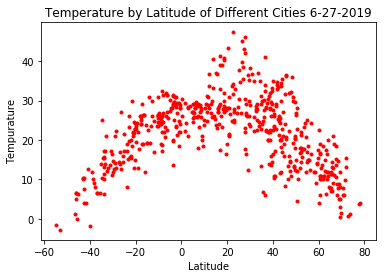

In [24]:
TempPlot = plt.scatter(lat, temp, marker=".", facecolors="red", alpha=1, label = "Tempurature")

plt.title("Temperature by Latitude of Different Cities 6-27-2019")
plt.xlabel("Latitude")
plt.ylabel("Tempurature")

plt.savefig("temp.png")
plt.show()

#### Latitude vs. Humidity Plot

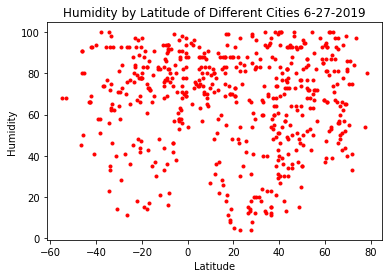

In [25]:
HumPlot = plt.scatter(lat, hum, marker=".", facecolors="red", alpha=1, label = "Humidity")

plt.title("Humidity by Latitude of Different Cities 6-27-2019")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.savefig("hum.png")
plt.show()

#### Latitude vs. Cloudiness Plot

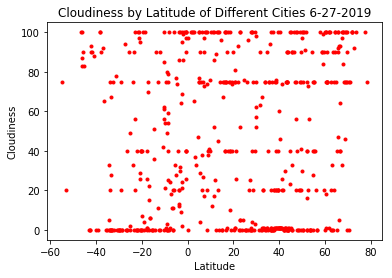

In [26]:
CloudPlot = plt.scatter(lat, cloud, marker=".", facecolors="red", alpha=1, label = "Cloudiness")

plt.title("Cloudiness by Latitude of Different Cities 6-27-2019")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.savefig("cloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

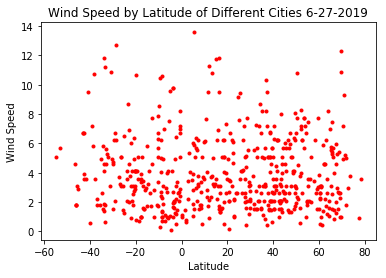

In [27]:
WSPlot = plt.scatter(lat, WS, marker=".", facecolors="red", alpha=1, label = "Wind Speed")

plt.title("Wind Speed by Latitude of Different Cities 6-27-2019")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.savefig("WS.png")
plt.show()

In [43]:
print('\033[1m' + 'Observable Trends:')    
print(' ')
print("1. The tempurature has the most obvious trend of the four charts. Starting from latitude -20, the tempurature is (not strictly) increasing up to latitude around 0, then decreases. This makes sense, as we would expect tempurature to increase towards the equator.")
print(' ')
print("2. The cloudiness level seems to have a trend independent of the latitude, where most of the percents are at 0, 20, 40, 80, and 100. I wonder if this is a limitation on the way the data was measured?")
print(' ')
print("3. We notice one point of interest in the Humidity plot, the latitude 0 point. There seem to be lower values everywhere except right at 0, where the humidity is always high valued. Again we would expect this since 0 is the equator.")

Observable Trends:
 
1. The tempurature has the most obvious trend of the four charts. Starting from latitude -20, the tempurature is (not strictly) increasing up to latitude around 0, then decreases. This makes sense, as we would expect tempurature to increase towards the equator.
 
2. The cloudiness level seems to have a trend independent of the latitude, where most of the percents are at 0, 20, 40, 80, and 100. I wonder if this is a limitation on the way the data was measured?
 
3. We notice one point of interest in the Humidity plot, the latitude 0 point. There seem to be lower values everywhere except right at 0, where the humidity is always high valued. Again we would expect this since 0 is the equator.
